<a href="https://colab.research.google.com/github/mars-orbiter/GAIA/blob/main/Constellations_with_Gaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the required libraries -

In [9]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

### Importing the dataset csv from my github - 

In [10]:
#accessing the csv file and displaying it
dataset = pd.read_csv('https://raw.githubusercontent.com/mars-orbiter/GAIA/main/constellation.csv', encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dataset)

                            Name          RA        Dec   parallax  \
0                   Theta Cephei  307.395779  62.994049  23.481038   
1                     Eta Cephei  311.323206  61.842419  69.597554   
2                      Alderamin  319.646337  62.585796        NaN   
3                         Alfirk  322.165053  70.560719        NaN   
4         Herschel's Garnet Star  325.876944  58.780028   0.119024   
5                      Nu Cephei  326.362155  61.120797   0.932088   
6                    Zeta Cephei  332.713770  58.201285   3.297198   
7                 Epsilon Cephei  333.762613  57.043803  38.159770   
8                   Delta Cephei  337.292885  58.415208   3.555064   
9   Rho-2 Cephei/ Al kalb al rai  337.470823  78.824194  13.603749   
10                   Iota Cephei  342.419347  66.199850  27.286898   
11                     Pi Cephei  346.974507  75.387361  12.145783   
12     Gamma Cephei/ Alrai/Errai  354.835781  77.633125  72.516692   

    parallax_err.  

### Storing the data from each column into a separate array for easier handling -

In [11]:
# accessing the different columns of the csv dataset I made above
dataset.columns = ["Name","RA","Dec","parallax","parallax_err.","pmra","pmdec","App_mag","Distance_ly"]

#storing values for each column into a separate list
Name = np.array(dataset.Name)                       #Name of the stars
RA = np.array(dataset.RA)                           # Right ascension in degrees
Dec = np.array(dataset.Dec)                         # Declination in degrees
Distance = np.array(dataset.Distance_ly)            # Distance in lightyears
pmRA = np.array(dataset.pmra)                       # Proper motion along RA
pmDec = np.array(dataset.pmdec)                     # Proper motion along Dec

### PLotting RA v/s Declination -

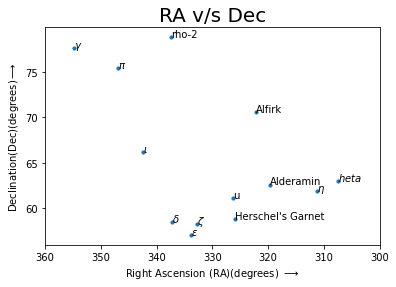

In [26]:
#plotting a scatter plot for RA and Dec

plt.scatter(RA,Dec, s=10)
plt.xlabel('Right Ascension (RA)(degrees) $\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.xlim(360,300)
plt.title('RA v/s Dec', fontsize = 20)

#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']

#labelling each individual star 
for i in range(len(name)):
  plt.annotate(name[i], (RA[i],Dec[i]))
plt.show()

### Plotting Proper motion along RA and Declination -

$$\text{Right ascension after proper motion, pmRA}=RA +\frac{\text{pmRA*t}}{3600000}$$

$$\text{Declination after proper motion, pmDec}= Dec+\frac{\text{pmDec*t}}{3600000}$$

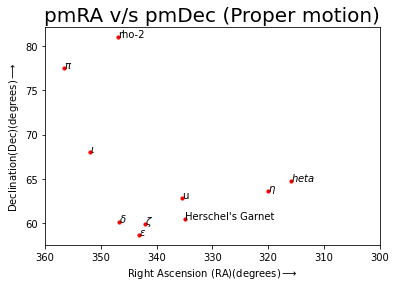

In [27]:
#plotting a scatter plot for RA and Dec (proper motion)

t = 100000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

plt.scatter(pmRA,pmDec,color = 'red', s = 10)
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('pmRA v/s pmDec (Proper motion)', fontsize = 20)
#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']

#labelling each individual star 
for i in range(len(name)):
  plt.annotate(name[i], (pmRA[i],pmDec[i]))

plt.xlim(360,300)
plt.show()

### Plotting RA v/s Distance of each star - 

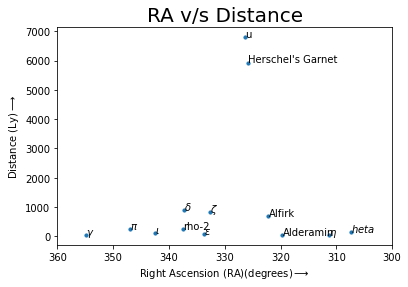

In [28]:
#plotting a scatter plot for RA and Distance

plt.scatter(RA,Distance, s=10)
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Distance (Ly)$\longrightarrow$')
plt.title('RA v/s Distance', fontsize = 20)

#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']

#labelling each individual star 
for i in range(len(name)):
  plt.annotate(name[i], (RA[i],Distance[i]))

plt.xlim(360,300)
plt.show()

###Plotting RA v/s Dec v/s Distance of the stars in the constellation - 

This is done to clearly show that even if some stars lie in the same region of sky, it is not necessary, at all, for them to be equidistant from us. Clearly, the stars of the constellation Cepheus which I have plotted, are not at the same distance from us.

Defining functions needed for annotation of points in a 3D plot

In [33]:
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

Generating a 3D plot for RA v/s Dec v/s Distance, all stars labelled -

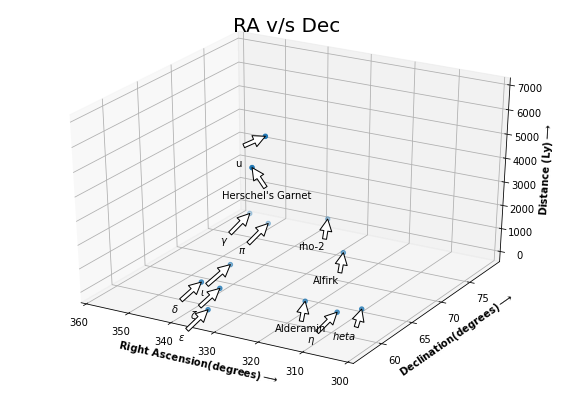

In [36]:
# Function to create 3D scatter plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']
# Create Plot
ax.set_xlabel('Right Ascension(degrees)$\longrightarrow$', fontweight ='bold')
ax.set_ylabel('Declination(degrees)$\longrightarrow$', fontweight ='bold')
ax.set_zlabel('Distance (Ly)$\longrightarrow$', fontweight ='bold')
ax.scatter3D(RA,Dec,Distance)

for i in range(len(name)):
  ax.annotate3D(name[i], (RA[i],Dec[i],Distance[i]),
                xytext=(-30, -30),
                textcoords='offset points',
                arrowprops=dict(ec='black', fc='white'))
plt.title('RA v/s Dec', fontsize = 20)
plt.xlim(360,300)
plt.show()

### Showing proper motion relative to their present position - 

Plot to show movement of the stars of the constellation through a period of 100000 years.

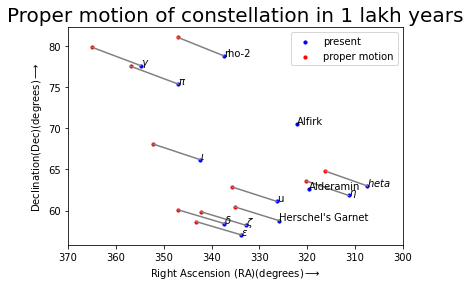

In [29]:
t = 100000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

#plotting a scatter plot for RA and Dec
plt.scatter(RA,Dec,color = 'blue', s=10, label = 'present')
#---------------------------------------------------------------------
#plotting a scatter plot for RA and Dec (proper motion)
plt.scatter(pmRA,pmDec,color = 'red', s = 10, label = 'proper motion')

#joining the stars together to show their movement

ra_val= np.array([RA,pmRA])
dec_val=np.array([Dec,pmDec])
plt.plot(ra_val, 
         dec_val, 
         color='gray')
#plotting
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('Proper motion of constellation in 1 lakh years', fontsize = 20)

#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']

#labelling each individual star 
for i in range(len(name)):
  plt.annotate(name[i], (RA[i],Dec[i]))
plt.xlim(370,300)
plt.legend()
plt.show()

Plot to show movement of the stars of the constellation through a period of 10000 years.

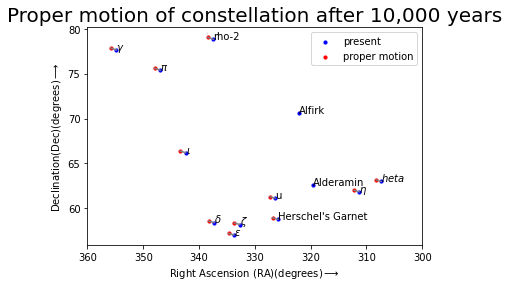

In [30]:
t = 10000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

#plotting a scatter plot for RA and Dec
plt.scatter(RA,Dec,color = 'blue', s=10, label = 'present')
#---------------------------------------------------------------------
#plotting a scatter plot for RA and Dec (proper motion)
plt.scatter(pmRA,pmDec,color = 'red', s = 10, label = 'proper motion')

#joining the stars together to show their movement

ra_val= np.array([RA,pmRA])
dec_val=np.array([Dec,pmDec])
plt.plot(ra_val, 
         dec_val, 
         color='gray')
#plotting
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('Proper motion of constellation after 10,000 years', fontsize = 20)
plt.legend()

#list of names of stars
name = ['$\theta$','$\eta$','Alderamin','Alfirk', "Herschel's Garnet","\nu",'$\zeta$','$\epsilon$','$\delta$','rho-2','$\iota$','$\pi$','$\gamma$']

#labelling each individual star 
for i in range(len(name)):
  plt.annotate(name[i], (RA[i],Dec[i]))
plt.xlim(360,300)
plt.show()